In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

In [2]:
from lib.minority_game_vectorized import VectorizedMinorityGame
from lib.agents.factory_vectorized import VectorizedAgentFactory
from lib.memory import UniformMemoryGenerator

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

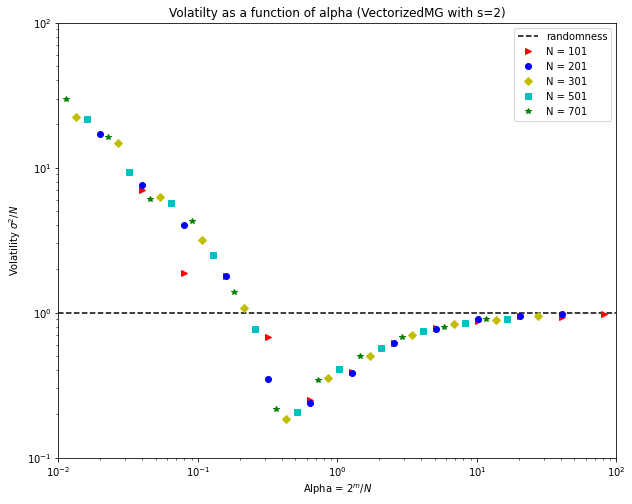

In [3]:
def n_agents_combined_graph():
    omega_graph = []
    alpha_graph = []

    N_agents = [101, 201, 301, 501, 701]
    graphs = [">r", "bo", "Dy", "sc", "*g"]

    for n_agents in N_agents:
        tot_omega = []
        tot_alpha = []

        for M in range (2,14):
            _, attendances = VectorizedMinorityGame(
                n_agents=n_agents,
                factory_dict={
                    1: VectorizedAgentFactory(
                        memory_generator=UniformMemoryGenerator(M)
                    )
                },
            ).simulate_game(max_steps=50000)
            # in order to create the graph
            omega = np.var(attendances)/n_agents
            alpha = 2**M/n_agents
        
            tot_omega.append(omega)
            tot_alpha.append(alpha)

        omega_graph.append(tot_omega)
        alpha_graph.append(tot_alpha)

    # everything in one graph
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.axhline(y=1, color="k", linestyle="--", label="randomness") # vol = 1 -> randomness
    
    for i in range(len(graphs)):
        ax.plot(alpha_graph[i], omega_graph[i], graphs[i], label=f"N = {N_agents[i]}")

    ax.set_xlabel("Alpha = $2^m/N$")
    ax.set_ylabel("Volatility $\sigma^2/N$")
    ax.legend()

    plt.title("Volatilty as a function of alpha (VectorizedMG with s=2)")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([0.01, 100])
    plt.ylim([0.1, 100])

    plt.show()

n_agents_combined_graph()